In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("police shootings.csv")
data.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [5]:
data.shape

(7729, 17)

In [6]:
data.isnull().sum()

id                            0
name                        417
date                          0
manner_of_death               0
armed                       209
age                         482
gender                       20
race                       1460
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        875
body_camera                   0
longitude                   837
latitude                    837
is_geocoding_exact            0
dtype: int64

##### Для начала преобразуем абревиатуры штатов в полноценные названия, для более удобной работы

In [7]:
data.state.unique()

array(['WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'IA', 'PA', 'TX', 'OH',
       'LA', 'MT', 'UT', 'AR', 'IL', 'NV', 'NM', 'MN', 'MO', 'VA', 'NJ',
       'IN', 'KY', 'MA', 'NH', 'FL', 'ID', 'MD', 'NE', 'MI', 'GA', 'TN',
       'NC', 'AK', 'NY', 'ME', 'AL', 'MS', 'WI', 'SC', 'DE', 'DC', 'WV',
       'HI', 'WY', 'ND', 'CT', 'SD', 'VT', 'RI'], dtype=object)

In [8]:
data['statefn'] = 0
data['statefn'] = data['state'].replace(['WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'IA', 'PA', 'TX', 'OH',
                                        'LA', 'MT', 'UT', 'AR', 'IL', 'NV', 'NM', 'MN', 'MO', 'VA', 'NJ',
                                        'IN', 'KY', 'MA', 'NH', 'FL', 'ID', 'MD', 'NE', 'MI', 'GA', 'TN',
                                        'NC', 'AK', 'NY', 'ME', 'AL', 'MS', 'WI', 'SC', 'DE', 'DC', 'WV',
                                         'HI', 'WY', 'ND', 'CT', 'SD', 'VT', 'RI'],
                                        ['Washington', 'Oregon', 'Kansas', 'California', 'Colorado', 'Oklahoma', 'Arizona',
                                        'Iowa', 'Pennsylvania', 'Texas', 'Ohio', 'Louisiana', 'Montana', 'Utah', 'Arkansas',
                                        'Illinois', 'Nevada', ' New Mexico', 'Minnesota', 'Missouri', 'Virginia', 'New Jersey',
                                        'Indiana', 'Kentucky', 'Massachusetts', 'New Hampshire', 'Florida', 'Idaho', 'Maryland', 'Nebraska',
                                        'Michigan', 'Georgia', 'Tennessee', 'North Carolina', 'Alaska', 'New York', 'Maine',
                                        'Alabama', 'Mississippi', 'Wisconsin', 'South Carolina', 'Delaware', 'Columbia',
                                        'West Virginia', 'Hawai', 'Wyoming', 'North Dakota', 'Connecticut', 'South Dakota',
                                        'Vermont', 'Rhode Island'])

### Начнем с попытки заполнения пустых значений

In [9]:
df1 = data['armed'].value_counts()
df1[df1>50]

gun               4407
knife             1108
unarmed            456
undetermined       313
vehicle            276
toy weapon         245
unknown weapon     119
machete             61
Name: armed, dtype: int64

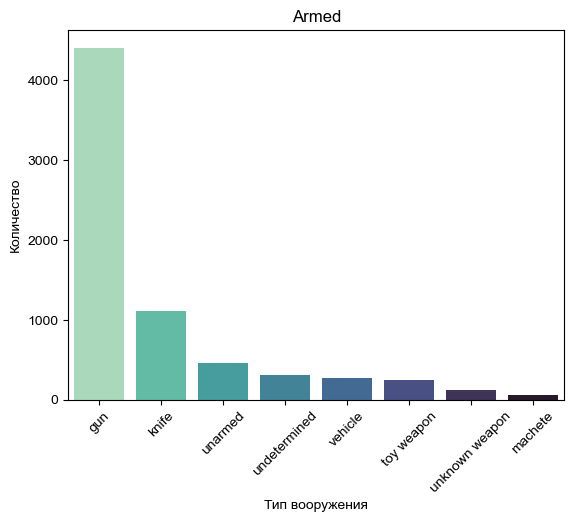

In [10]:
sns.barplot(x = df1[df1>50].index, y = df1[df1>50], palette = 'mako_r')
sns.set(font_scale = 1)
plt.xlabel('Тип вооружения')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.title('Armed')
plt.show()

##### Как мы видим из графика, наибольшей популярностью пользуется стрелковое оружие
Заполним все недостающие значения типом "gun", координальные изменения, недостающие значения в общую картину, не внесут. Поэтому можем присваивать без последствий

In [11]:
data['armed'].fillna('gun', inplace = True)

In [12]:
data['age'].nunique()

81

In [13]:
data['age'].max(), data['age'].min()

(92.0, 2.0)

###### Как видно, самому молодому "преступнику", всего 2 года?! А самому пожилому аж 92. Мы можем только предполагать, что могли совершить два таких рецидивиста XD
_В обоих случаях, расовая принадлежность не указана_

In [14]:
data.loc[data['age']==2]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,statefn
7240,7241,Clesslynn Jane Crawford,2022-03-26,shot,unarmed,2.0,F,NaN,Baxter Springs,KS,False,other,NaN,False,-94.736,37.024,True,Kansas


In [15]:
data[data['age']==92]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,statefn
6871,6872,NaN,2021-11-16,shot,gun,92.0,M,NaN,Caldwell,ID,False,attack,Not fleeing,False,NaN,NaN,True,Idaho


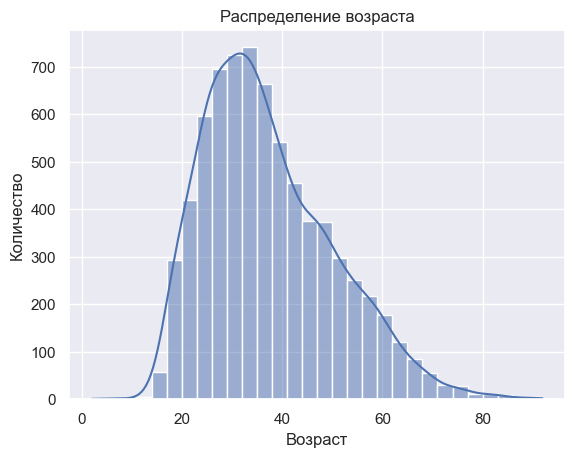

In [16]:
sns.histplot(x = data['age'], kde = True, binwidth = 3)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

In [17]:
data['age'].mean()

37.17897060852766

_Попробуем заполнить недостающие значения средним возрастом и посмотреть, что изменится_

In [18]:
data['age'].fillna(37, inplace = True)
data['age'].isnull().sum() # Пустых значений возраста больше нет

0

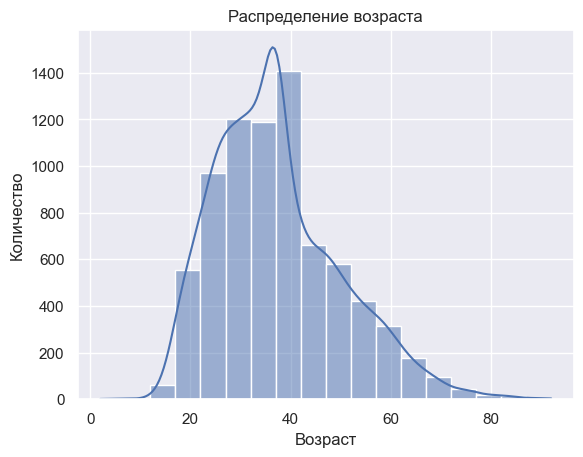

In [19]:
sns.histplot(x = data['age'], kde = True, binwidth = 5)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

In [20]:
data['gender'].value_counts()

M    7361
F     348
Name: gender, dtype: int64

_Пропущено всего 20 значений 'gender', которые можно выбросить_

In [21]:
data.dropna(how = 'any', subset = 'gender', inplace = True)

In [22]:
data.gender.isnull().sum()

0

In [23]:
data.isnull().sum()

id                            0
name                        402
date                          0
manner_of_death               0
armed                         0
age                           0
gender                        0
race                       1442
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                   833
latitude                    833
is_geocoding_exact            0
statefn                       0
dtype: int64

_Придумаем, что сделать с данными 'flee'_

In [24]:
data['flee'].value_counts()

Not fleeing    4333
Car            1247
Foot            979
Other           287
Name: flee, dtype: int64

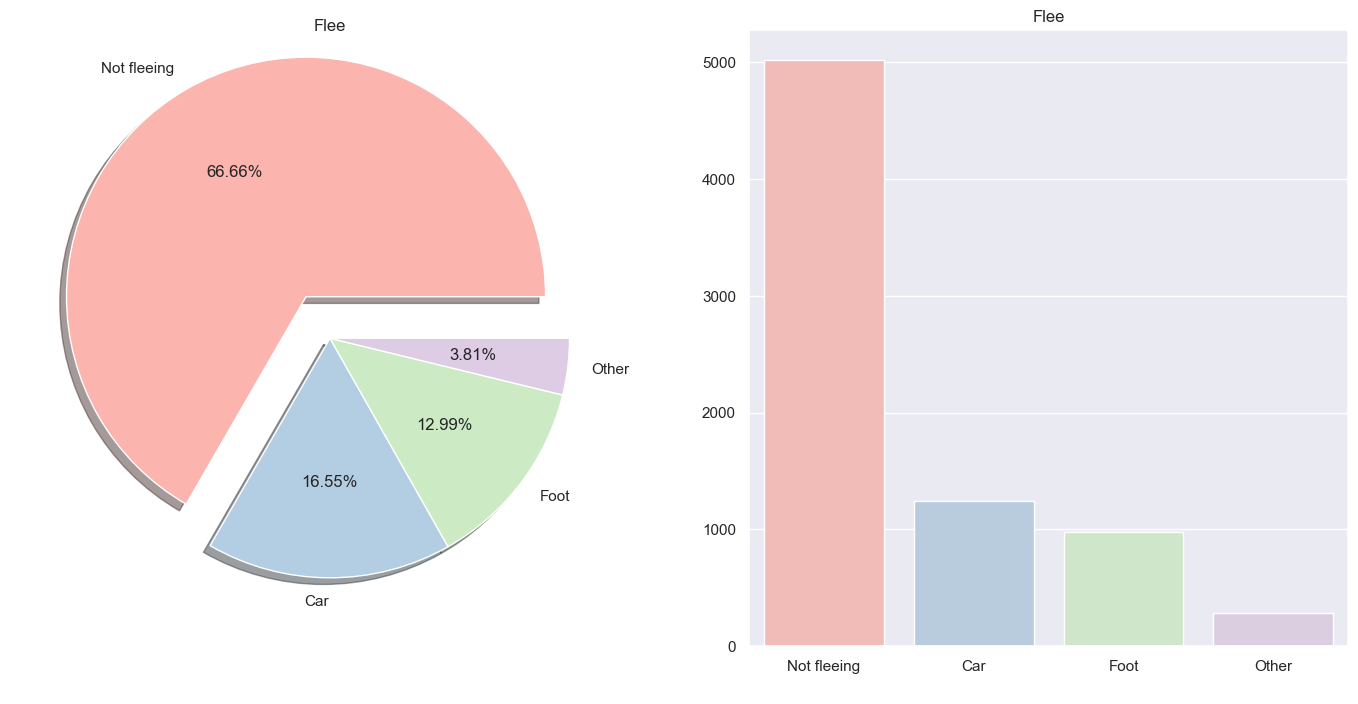

In [148]:
### plt.pie(data['flee'].value_counts(), labels = data['flee'].value_counts().index,
#        explode = [0.2, 0, 0, 0], shadow = True, autopct = '%1.2f%%',
#        colors = sns.color_palette('Pastel1'))
#        с таким кодом присвоить положение ax0 или 1 у меня не получилось

f,ax = plt.subplots(1, 2, figsize = (17, 8))
data['flee'].value_counts().plot.pie(explode = [0.2, 0, 0, 0],autopct='%1.2f%%',
                                     shadow=True, ax = ax[0], colors = sns.color_palette('Pastel1'))    
ax[0].set_title('Flee')
ax[0].set_ylabel(' ')
sns.countplot(data=data, x= 'flee', palette = 'Pastel1', ax = ax[1])
ax[1].set_title('Flee')
ax[1].set_xlabel(' ')
ax[1].set_ylabel(' ')
plt.show()

 _Пойдя по пути наименьшего сопротивления, так же присвоим все пустые значения категории 'Not fleeng'_

In [26]:
data.loc[(data['flee'].isnull()&data['longitude'].isnull())].isnull().sum()

id                           0
name                        32
date                         0
manner_of_death              0
armed                        0
age                          0
gender                       0
race                       126
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       172
body_camera                  0
longitude                  172
latitude                   172
is_geocoding_exact           0
statefn                      0
dtype: int64

 _Пустые значения с вариантом побега, координатами, так еще и с неизвестной расой, в будущем, точно ничего не дадут,
поэтому, как уже было написано ранее, данные строки удалим, а оставшимся пустым значениям 'flee', присвоим "not fleeing"_ 

In [27]:
data.dropna(how = 'all', subset = ['flee', 'longitude'], inplace = True)

In [28]:
data.isnull().sum()

id                            0
name                        370
date                          0
manner_of_death               0
armed                         0
age                           0
gender                        0
race                       1316
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        691
body_camera                   0
longitude                   661
latitude                    661
is_geocoding_exact            0
statefn                       0
dtype: int64

_По всей видимости,  удалилось как раз то, что и планировалось! Что не может не радовать_ 😂

_Далее, заполняем значения_

In [29]:
data['flee'].fillna('Not fleeing', inplace = True)

In [30]:
data['flee'].isnull().sum()

0

In [31]:
data.isnull().sum()

id                            0
name                        370
date                          0
manner_of_death               0
armed                         0
age                           0
gender                        0
race                       1316
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                          0
body_camera                   0
longitude                   661
latitude                    661
is_geocoding_exact            0
statefn                       0
dtype: int64

##### Чем заполнить расы, честно говоря, не придумал, там в любом случае будет "мальцем в небо", поэтому решил на данном этапе пока оставить их пустыми. С координатами та же ситуация, их либо удалять, либо оставить как есть, пока не мешают

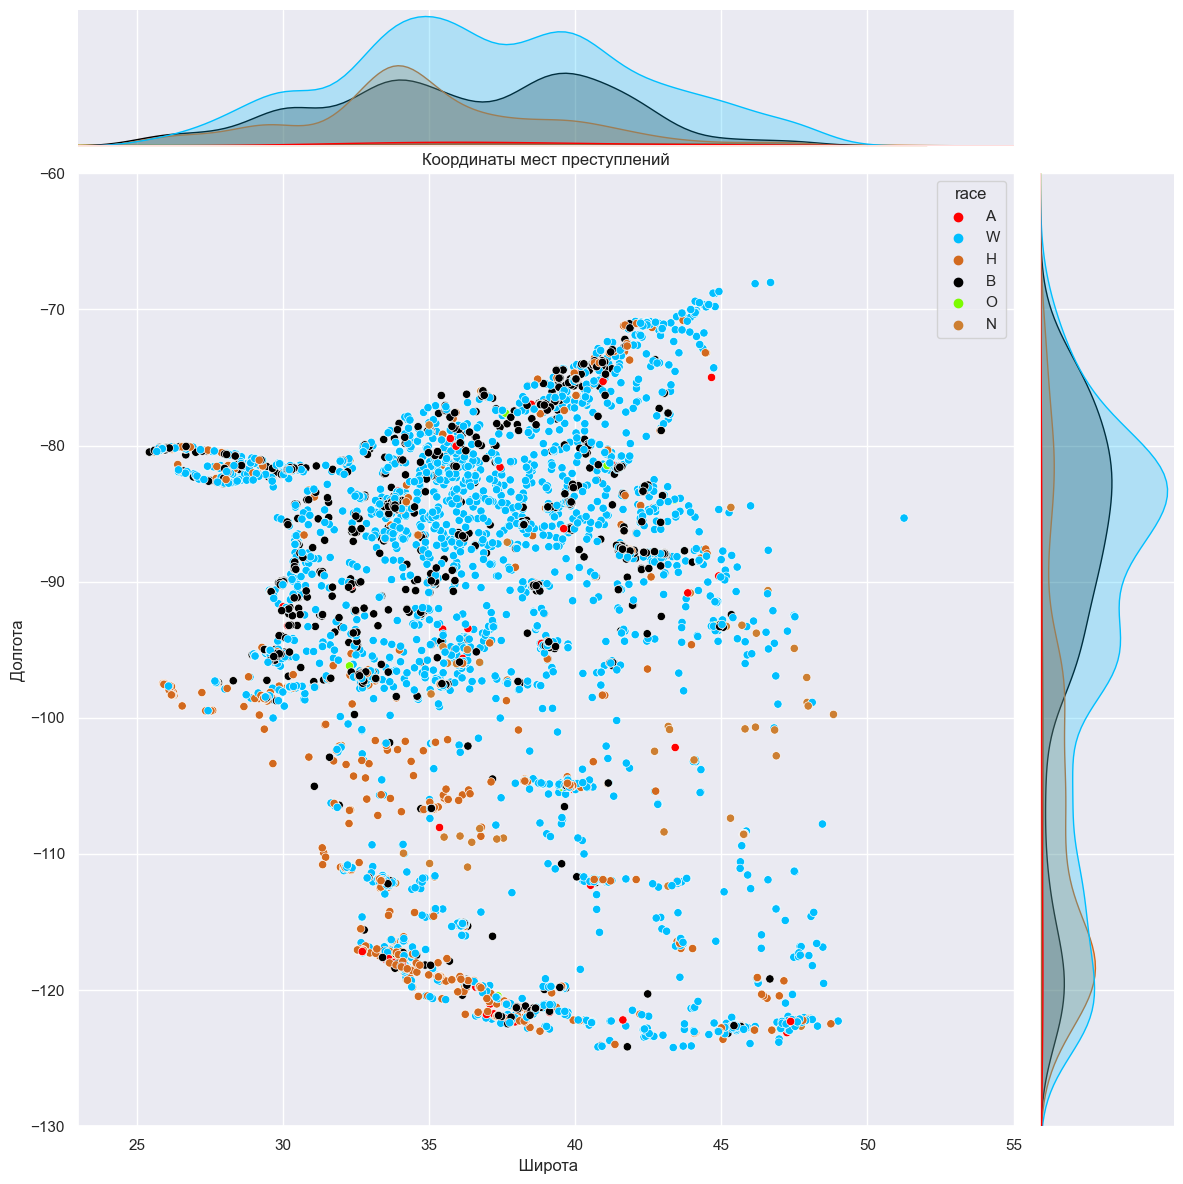

In [140]:
sp = sns.jointplot(x = 'latitude', y = 'longitude',hue = 'race',
              data=data,height = 12, ratio = 6,
              xlim = [23, 55], ylim = [-130, -60],  ### Края обрезал, там были единичные точки, они создавали только "шумы"
              palette = ['#FF0000', '#00BFFF', '#D2691E', '#000000', '#7CFC00', '#CD7F32']) ### и сильно уменьшали масштаб
plt.xlabel(' Широта')
plt.ylabel('Долгота')
plt.title('Координаты мест преступлений')
plt.show()

_Из вышепредставленной диаграммы можно предположить, что подавляющее большинство преступлений было совершено "белыми",
но этого не достаточно, чтобы делать соответствующие выводы_

### Работа относительно даты

In [33]:
data['date'] = data['date'].astype('datetime64')

In [34]:
data['year'] = data['date'].dt.year ### разбиение даты на отдельные столбцы
data['month'] = data['date'].dt.month

In [123]:
data.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,statefn,year,month
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,Washington,2015,1
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,Oregon,2015,1
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,Kansas,2015,1


In [40]:
data['manner_of_death'].value_counts()

shot                7198
shot and Tasered     339
Name: manner_of_death, dtype: int64

In [41]:
pd.crosstab([data['race'],data['manner_of_death']], data['month'],
            margins=True).style.background_gradient(cmap = 'summer_r')

_При разбиении на месяца, картина координальным образом не меняется, все равно больше всего страдают белые.
Скорее всего это связано с преобладанием представителей данного цвета кожи в Америке. За ними  следуют афро- и латиноамериканцы_

In [42]:
ct = pd.crosstab([data['race'],data['manner_of_death']], data['year'],
            margins=True).style.background_gradient(cmap = 'summer_r')
ct

_По годам ситуация так же складывается не в пользу белых_

In [77]:
df2020 = pd.DataFrame({'Race':['White', 'Black', ### Инфу брал с https://www.statdata.ru/nacionalnyj-sostav-usa
                               'Hispanic', 'Asiat', 'N_Americ', 'Other'],
                       'People':[0.578,0.121,0.187,0.059,0.009,0.046],
                      'Shot': [437, 224, 164, 13, 7, 3]})
df2020.set_index('Race', inplace = True)
df2020.style.background_gradient('summer_r')

,People,Shot
Race,,
White,0.578000,437
Black,0.121000,224
Hispanic,0.187000,164
Asiat,0.059000,13
N_Americ,0.009000,7
Other,0.046000,3


_В данный дата сет вынес значения, населения и преступлений за 2020г_

In [78]:
df2020['Values']=df2020['Shot']/df2020['People']
df2020.style.background_gradient(cmap = 'summer_r')

,People,Shot,Values
Race,,,
White,0.578000,437,756.055363
Black,0.121000,224,1851.239669
Hispanic,0.187000,164,877.005348
Asiat,0.059000,13,220.338983
N_Americ,0.009000,7,777.777778
Other,0.046000,3,65.217391


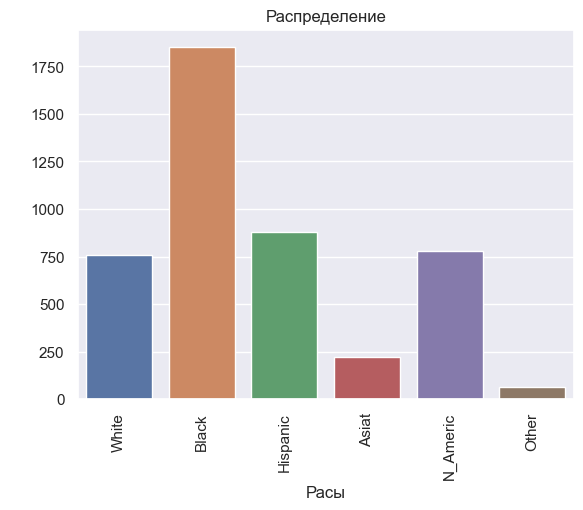

In [147]:
sns.barplot(x = df2020.index, y = 'Values', data=df2020)
plt.xticks(rotation = 90) 
plt.title('Распределение')
plt.xlabel('Расы')
plt.ylabel(' ')
plt.show()

### Вывод
_Представленный выше подсчет, весьма условный, и не является точным, но этого и не нужно, ведь задача стояла выяснить, есть ли связь с расизмом. И да, она есть, ведь казалось бы, на первый взгляд все очевидно, белых было застрелено больше всего, но это только на первый взгляд, ведь согласно подсчетам населения на 2020г. в Америке почти 58% населения составляют Американцы со светлым цветом кожи, а оставшиеся 42% распределены между остальными расами, которых насчитывается не мало. Вот и выходит, огромное количество преступлений среди белых, нивелируется плотностью населения, чего нельзя сказать об их темнокожих "коллегах по ремеслу". Совершенных преступлений среди них, как представлено выше, почти в 2 раза меньше, но если смотреть относительно плотности населения, то картина вырисовывается удручающая, ведь плотность населения среди афроамериканцев почти в 5 раз меньше, чем среди представителей светлого цвета кожи.
Лояльнее всего полицейские относятся к представителям Азиаткой внешности, либо подавляющее большинство из них добросовестные граждане, не преступающие закон._

### heatmap.corr не стал строить, особой необходимости не было. Слишком много признаков, которые пришлось бы разбивать на группы. Изначально она планировалась
##### Но если надо, организую )